## Pemodelan prediksi Cool and Warm by Season menggunakan RNN

Data yang digunakan merupakan indeks El Nino La Nina yang dapat diunduh melalui laman : https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php

### Import Pustaka

Berikut adalah daftar pustaka yang digunakan dalam pemodelan RNN ini:

In [1]:
# Mengimport Pustaka yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.layers import GRU, Dense, Dropout
import itertools
import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [2]:
df=pd.read_excel('Data c&w.xlsx')

In [3]:
df.tail()

,Year,DJF,JFM,FMA,MAM,AMJ,MJJ,JJA,JAS,ASO,SON,OND,NDJ
70,2020,0.5,0.5,0.4,0.2,-0.1,-0.3,-0.4,-0.6,-0.9,-1.2,-1.3,-1.2
71,2021,-1.0,-0.9,-0.8,-0.7,-0.5,-0.4,-0.4,-0.5,-0.7,-0.8,-1.0,-1.0
72,2022,-1.0,-0.9,-1.0,-1.1,-1.0,-0.9,-0.8,-0.9,-1.0,-1.0,-0.9,-0.8
73,2023,-0.7,-0.4,-0.1,0.2,0.5,0.8,1.1,1.3,1.6,1.8,1.9,2.0
74,2024,1.8,1.5,1.1,0.7,0.4,0.2,0.0,-0.1,NaN,NaN,NaN,NaN


### Data Cleaning

In [4]:
df.dropna(inplace=True)

In [5]:
df.tail()

,Year,DJF,JFM,FMA,MAM,AMJ,MJJ,JJA,JAS,ASO,SON,OND,NDJ
69,2019,0.7,0.7,0.7,0.7,0.5,0.5,0.3,0.1,0.2,0.3,0.5,0.5
70,2020,0.5,0.5,0.4,0.2,-0.1,-0.3,-0.4,-0.6,-0.9,-1.2,-1.3,-1.2
71,2021,-1.0,-0.9,-0.8,-0.7,-0.5,-0.4,-0.4,-0.5,-0.7,-0.8,-1.0,-1.0
72,2022,-1.0,-0.9,-1.0,-1.1,-1.0,-0.9,-0.8,-0.9,-1.0,-1.0,-0.9,-0.8
73,2023,-0.7,-0.4,-0.1,0.2,0.5,0.8,1.1,1.3,1.6,1.8,1.9,2.0


In [6]:
data = df.set_index('Year', inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 1950 to 2023
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DJF     74 non-null     float64
 1   JFM     74 non-null     float64
 2   FMA     74 non-null     float64
 3   MAM     74 non-null     float64
 4   AMJ     74 non-null     float64
 5   MJJ     74 non-null     float64
 6   JJA     74 non-null     float64
 7   JAS     74 non-null     float64
 8   ASO     74 non-null     float64
 9   SON     74 non-null     float64
 10  OND     74 non-null     float64
 11  NDJ     74 non-null     float64
dtypes: float64(12)
memory usage: 7.5 KB


### Normalisasi Data

In [8]:
years = np.arange(2000, 2030, 0.03)  # Generate years from 2000 to 2029
data = np.sin(np.linspace(0, 100, len(years))) + np.random.normal(0, 0.1, len(years))

In [9]:
data1 = np.array([df])
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data1.reshape(-1, 1))

In [10]:
# Membuat Sequence Data
def create_sequences(data1, seq_length):
    X, y = [], []
    for i in range(len(data1) - seq_length):
        X.append(data1[i:(i + seq_length)])
        y.append(data1[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Panjang sequence
X, y = create_sequences(scaled_data, seq_length)

In [11]:
# Splitt data training dan testing, 90:10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# 80:20
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)
# 70:30
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=42)

##### Pendefinisian Model RNN

In [12]:
# initializing the RNN
model = Sequential()

# adding RNN layers and dropout regularization
model.add(SimpleRNN(units = 50, 
                        activation = "tanh",
                        return_sequences = True,
                        input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(SimpleRNN(units = 50, 
                        activation = "tanh",
                        return_sequences = True))

model.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True))

model.add(SimpleRNN(units = 50,
                        activation='tanh'))

# adding the output layer
model.add(Dense(units = 1,
                        activation='relu'))


In [13]:
# Compile model
model.compile(optimizer='adam', loss='mse')

In [14]:
# Training model 90:10
model.fit(X_train, y_train, 
          epochs=100, 
          batch_size=32, 
          validation_split=0.1,
          verbose=1)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - loss: 0.1745 - val_loss: 0.0269
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0324 - val_loss: 0.0157
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0139 - val_loss: 0.0107
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0118 - val_loss: 0.0138
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0099 - val_loss: 0.0062
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0079 - val_loss: 0.0048
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0066 - val_loss: 0.0041
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0058 - val_loss: 0.0034
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0055 - val_loss: 0.0032
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0043 - val_loss: 0.0033
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0049 - val_loss: 0.0067
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/st

In [15]:
# Training model 80:20
model.fit(X_train2, y_train2, 
          epochs=100, 
          batch_size=32, 
          validation_split=0.1,
          verbose=1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0022 - val_loss: 8.7594e-04
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0013 - val_loss: 9.2353e-04
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0013 - val_loss: 9.6975e-04
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0013 - val_loss: 9.8871e-04
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0016 - val_loss: 7.8832e-04
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0010 - val_loss: 0.0021
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0018 - val_loss: 9.0765e-04
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0011 - val_loss: 6.4952e-04
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0011 - val_loss: 8.3650e-04
Epoch 12/100
20/20 ━

In [16]:
# Training model 70:30
model.fit(X_train3, y_train3, 
          epochs=100, 
          batch_size=32, 
          validation_split=0.1,
          verbose=1)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8.5724e-04 - val_loss: 0.0015
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0013 - val_loss: 8.6534e-04
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.1685e-04 - val_loss: 8.9683e-04
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0010 - val_loss: 9.3309e-04
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.8867e-04 - val_loss: 6.3951e-04
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0012 - val_loss: 6.8225e-04
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.7308e-04 - val_loss: 7.6144e-04
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.6274e-04 - val_loss: 0.0032
Epoch 12

##### Evaluasi Data Training dan Data Testing

In [17]:
# Evaluasi model 90:10
train_score1 = model.evaluate(X_train, y_train)
test_score1 = model.evaluate(X_test, y_test)
print(f'MSE Data Training: {train_score1}')
print(f'MSE Data Testing: {test_score1}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.3165e-04
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.8067e-04
MSE Data Training: 0.000727963401004672
MSE Data Testing: 0.0007671874482184649


In [18]:
# Evaluasi model 80:20
train_score2 = model.evaluate(X_train2, y_train2)
test_score2 = model.evaluate(X_test2, y_test2)
print(f'MSE Data Training 2: {train_score2}')
print(f'MSE Data Testing 2: {test_score2}')

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.2075e-04
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.6764e-04 
MSE Data Training 2: 0.0007248104084283113
MSE Data Testing 2: 0.0007601522374898195


In [19]:
# Evaluasi model 70:30
train_score3 = model.evaluate(X_train3, y_train3)
test_score3 = model.evaluate(X_test3, y_test3)
print(f'MSE Data Training 3: {train_score3}')
print(f'MSE Data Testing 3: {test_score3}')

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.7853e-04
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.7221e-04 
MSE Data Training 3: 0.0007110037258826196
MSE Data Testing 3: 0.0007804823690094054


##### Prediksi model

In [20]:
# 90:10
predictions1 = model.predict(X_test)
# 80:20
predictions2 = model.predict(X_test2)
# 70:30
predictions3 = model.predict(X_test3)

3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 449ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [21]:
# 90:10
predictions1 = scaler.inverse_transform(predictions1)
y_test_actual1 = scaler.inverse_transform(y_test)
# 80:20
predictions2 = scaler.inverse_transform(predictions2)
y_test_actual2 = scaler.inverse_transform(y_test2)
# 70:30
predictions3 = scaler.inverse_transform(predictions3)
y_test_actual3 = scaler.inverse_transform(y_test3)

##### Evaluasi model prediksi

In [22]:
r_squared1 = r2_score(y_test_actual1, predictions1)
r_squared2 = r2_score(y_test_actual2, predictions2)
r_squared3 = r2_score(y_test_actual3, predictions3)
print(f'R-squared model 1: {r_squared1}')
print(f'R-squared model 2: {r_squared2}')
print(f'R-squared model 3: {r_squared3}')

R-squared model 1: 0.9713933369880874
R-squared model 2: 0.9768322454572707
R-squared model 3: 0.974733907581806


##### Visualisasi Model

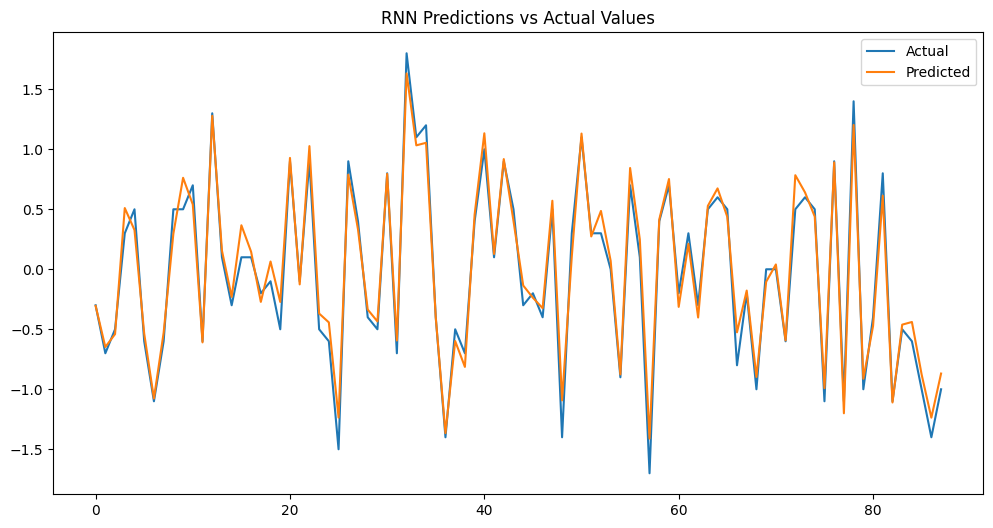

In [24]:
plt.figure(figsize=(12,6))
plt.plot(y_test_actual1, label='Actual')
plt.plot(predictions1, label='Predicted')
plt.legend()
plt.title('RNN Predictions vs Actual Values')
plt.show()

## Kesimpulan

- Pemodelan prediksi telah dilakukan menggunakn GRU RNN, pemodelan tersebut dilakukan dengan menggunakan beberapa perbandingan data training dan data testing yaitu 90:10, 80:20, 70:30. 
- Pemodelan prediksi menggunakan GRU RNN yang memiliki R2 Score paling baik adalah pada dataset dengan 80% data training dan 20% data testing yaitu sebesar 0.9792997670721768. R2 score mendekati nilai 1 menunjukkan bahwa model tersebut dapat digunakan untuk memprediksi data time series.
